<a href="https://colab.research.google.com/github/MissTife/sync-internship/blob/main/model_built.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the path to the uploaded model
model_path = '/content/C__Users_FAITHY_Documents_newmodel_model.h5'
# Load the model from the uploaded path
loaded_model = load_model(model_path)



1/1 [==============================] - 0s 30ms/step
Prediction: Mask (99.75%)


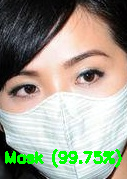

In [11]:

import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def predict_mask_on_uploaded_image(loaded_model):

    # Read the uploaded image
    img = cv2.imread("/content/with_mask_40.jpg")

    # Preprocess the image
    resized_img = cv2.resize(img, (100, 100))
    normalized_img = resized_img.astype('float32') / 255.0
    input_img = np.expand_dims(normalized_img, axis=0)

    # Perform prediction
    prediction = loaded_model.predict(input_img)
    mask_probability = prediction[0][1]
    without_mask_probability = prediction[0][0]

    # Display the result
    label = "Mask" if mask_probability > without_mask_probability else "No Mask"
    label += f" ({max(mask_probability, without_mask_probability) * 100:.2f}%)"
    print("Prediction:", label)

    # Display the uploaded image with prediction result
    img_with_label = img.copy()

    # Determine the height of the image
    height = img_with_label.shape[0]

    # Increase the font size for the label
    font_scale = 0.5

    # Calculate the size of the label text
    (label_width, label_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)

    # Calculate the position to center the label text at the bottom of the image
    text_x = int((img_with_label.shape[1] - label_width) / 2)
    text_y = height - int(0.1 * height)

    # Put the label on the image at the calculated position
    cv2.putText(img_with_label, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

    cv2_imshow(img_with_label)

# Call the function to predict on the uploaded image
predict_mask_on_uploaded_image(loaded_model)
